<a href="https://colab.research.google.com/github/vuongngo1234/report-homework2/blob/main/tienvnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

#mount drive vao code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#thêm data và xử lý data
folder = '/content/drive/MyDrive/tien/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('5000vnd'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('10000vnd'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('20000vnd'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('50000vnd'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('100000vnd'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('200000vnd'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('500000vnd'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
       
    
    
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('tien_photos.npy', photos)
save('tien_labels.npy', labels)

(11, 200, 200, 3) (11,)


In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train
history = model.fit(photos, labels, validation_split=0.1, epochs=30, verbose=1)
model.evaluate(photos,labels)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 300.0158 - accuracy: 0.1111 - val_loss: 9739.2676 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 10045.8408 - accuracy: 0.2222 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 4521.3892 - accuracy: 0.0000e+00 - val_loss: 4100.2695 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 1s 1s/step - loss: 3135.9827 - accuracy: 0.2222 - val_loss: 3532.4119 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 1s 913ms/step - loss: 1536.4309 - accuracy: 0.2222 - val_loss: 2677.3521 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 1s 932ms/step - loss: 384.7159 - accuracy: 0.2222 - val_loss: 3076.8655 - val_accuracy: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 1s 894ms/step - loss: 787.3737 - accuracy: 0.2222 - val_loss: 

[13.714258193969727, 0.8181818127632141]

In [ ]:
#lưu model
model.save('tien.h5')

In [ ]:
model.evaluate(photos,labels)

1/1 [==============================] - 0s 277ms/step - loss: 0.0012 - accuracy: 1.0000


[0.0012235064059495926, 1.0]

In [ ]:
model.save('tien.h5')

In [ ]:
classes = ["5000vnd","10000vnd","20000vnd","50000vnd","100000vnd","200000vnd","500000vnd"]

1/1 [==============================] - 0s 178ms/step
[[0.09366184 0.10112736 0.10400951 0.10109068 0.10943256 0.10628107
  0.10261082 0.09399495 0.09334165 0.09444957]]


'100000vnd'

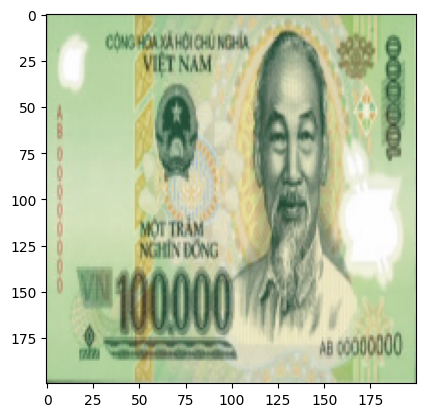

In [ ]:
#thử predict bằng model
img = load_img('/content/drive/MyDrive/tien/100000vnd (1).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]